<a href="https://colab.research.google.com/github/rpdahxn/MakeYourFirstGANWithPyTorch/blob/main/02_mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_train.csv', header = None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
import matplotlib.pyplot as plt

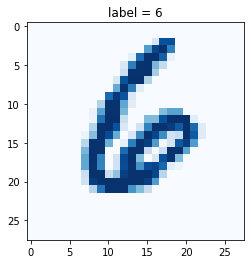

In [15]:
row = 13
data = df.iloc[row]

# 첫 번째 값을 레이블
label = data[0]

# 이미지 데이터는 나머지 784개의 값
img = data[1:].values.reshape(28, 28)
plt.title('label = ' + str(label))
plt.imshow(img, interpolation = 'none', cmap = 'Blues')
plt.show()

In [16]:
import torch
import torch.nn as nn

In [31]:
class Classifier(nn.Module):

  def __init__(self):
    # 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(784, 200),  # 784개 노드로부터 200개 노드까지 완전 연결 매핑. 훈련 시 업데이트 될 가중치에 대한 정보가 포함된다.
        nn.Sigmoid(),  # 이전 레이어부터의 출력(200개 노드)에 적용된다.
        nn.Linear(200, 10),  # 200개의 노드를 다시 10개의 노드로 연결. 중간 과정의 은닉 레이어와 10개 노드의 출력 레이어 간 가중치가 포함된다.
        nn.Sigmoid()  # 10개 노드의 출력에 적용되며 이를 통한 결과는 신경망의 최종 출력이다.
    )

    self.loss_function = nn.MSELoss()

    # 단순한 SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)

    self.counter = 0
    self.progress = []

    pass

  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)

    # 손실 계산
    loss = self.loss_function(outputs, targets)

    self.counter += 1
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    # 기울기 초기화, 역전파 실행, 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pd.DataFrame(self.progress, columns = ['loss'])
    df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.',
            grid = True, yticks = (0, 0.25, 0.5))
    pass

pass


In [32]:
from torch.utils.data import Dataset

In [33]:
class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0-255의 이미지를 0-1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [34]:
mnist_dataset = MnistDataset('/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_train.csv')

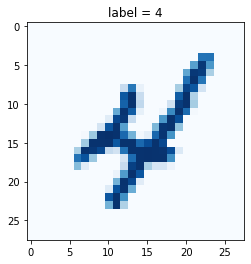

In [21]:
mnist_dataset.plot_image(9)

In [22]:
mnist_dataset[100]

(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

In [35]:
C = Classifier()

In [36]:
%%time

epochs = 3

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 4min 21s, sys: 2.9 s, total: 4min 24s
Wall time: 4min 41s


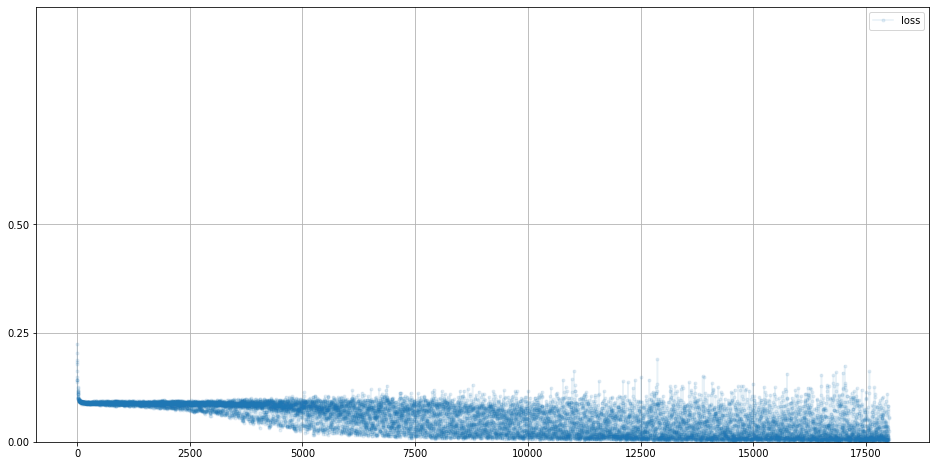

In [37]:
C.plot_progress()

In [39]:
mnist_test_dataset = MnistDataset('/content/mount/MyDrive/Colab Notebooks/mnist_data/mnist_test.csv')

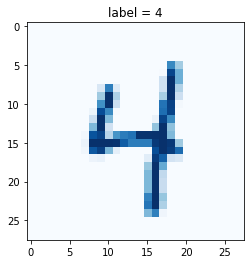

In [40]:
record = 19

mnist_test_dataset.plot_image(record)

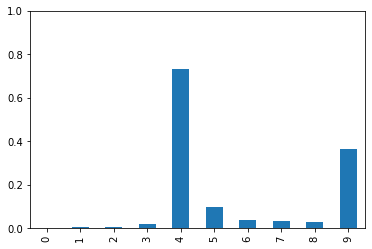

In [42]:
image_data = mnist_test_dataset[record][1]

# 훈련된 신경망으로부터 쿼리
output = C.forward(image_data)


# 텐서 출력
pd.DataFrame(output.detach().numpy()).plot(kind = 'bar', legend = False, ylim = (0, 1))

In [43]:
# 훈련된 신경망을 테스트 데이터셋에 대해 테스트


score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1


  pass


print(score, items, score / items)

8673 10000 0.8673


3epoch 보다 더 많이 훈련시키고 성능 확인하기

In [44]:
%%time

epochs = 100

for i in range(epochs):
  print('training epoch', i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass

training epoch 1 of 100
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
training epoch 2 of 100
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
training epoch 3 of 100
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
training epoch 4 of 100
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
training epoch 5 of 100
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
training epoch 6 of 100
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000
counter =  540000
training epoch 7 of 100
counter =  550000
counter =  560000
counter =  570000
counter =  580000
counter =  590000
counter =  600000
training epoch 8 of 100
counter =  610000
counter =  620000
counter =  63000

In [45]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1


  pass


print(score, items, score / items)

9616 10000 0.9616
